<a href="https://colab.research.google.com/github/tayyib-saddique/bbk-ds/blob/main/week2/random_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Introduction to Random mumber generation with computers

##### Von Neumann's [middle-square method](https://en.wikipedia.org/wiki/Middle-square_method)

In [ ]:

# the seed must come from outside, be unrelated.
# this is Alberto's street number
seed = 47

# let's generate a fixed quantity of samples

SAMPLES = 100

# initialise the seed
# which won't be revealed
trailer = seed

for _ in range(SAMPLES):

    new_value = trailer**2

    # a string can be indexed
    string_version = str(new_value)

    # print the central digits
    print(string_version[1 : 3])

    # Original: use the output as the new seed
    #trailer = int(string_version[1 : 3])

    # MOD: use the integer corresponding to the last 4 digits
    trailer = int(string_version[-4 : ])


20
87
37
10
25
41
30
59
50
79
66
08
40
47
07
46
31
18
31
85
38
95
22
41
62
15
88
66
84
89
56
30
51
38
61
84
04
07
20
12
99
54
82
31
31
97
38
73
53
79
69
32
19
68
78
02
06
91
15
87
03
24
89
02
74
10
76
79
27
02
33
14
22
14
64
23
23
53
19
41
86
08
35
52
07
46
73
66
69
80
53
55
60
41
30
76
65
96
00
76


#### Issues with random

We are using *deterministic* machinery to generate values that are valuable only because they are non-deterministic.

The issue of *periodicity*: if a number is ever repeated, the output will be deterministic from there on

### Random-number generation in Python

```bash
pip install random
```

Thanks to the *random* module we don't have to worry about bias in  data sampling!

#### Computers play games

A sequence is random when it seems impossible to predict the next number in the sequence.

Randomness bring fun to some games, like the lottery or tombola.

Fix N to be the largest possible integer.

With [Lotto](https://en.wikipedia.org/wiki/Lottery) and [Tombola](https://en.wikipedia.org/wiki/Tombola_(game)) games this is often set to 90.

Potential problem: a number could come out twice. Or never.

See the relevant documentation to see how ``random`` supports tombola-like extractions without replacement.

In [ ]:
import random as rand

N = 90

for _ in range(SAMPLES):
    print(int(rand.random()*N))

## Visualising randomness and noise

Please see this section only after having seen the ``matplolib`` notebook.

The ``scikit-learn`` module is in use but only as a way to obtain the data; it can be studied later.

#### The Olivetti faces benchmark

The Olivetti faces benchmark is a set of 400 images of grayscale mugshots.

They come as Numpy arrays of shape (400, 64, 64), where each value in the [0..255] range (0=black and 255=white).

In [ ]:
import numpy as np

from matplotlib import pyplot as plt

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
faces = fetch_olivetti_faces(shuffle=True, random_state=42)

dir(faces)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


['DESCR', 'data', 'images', 'target']

In [ ]:
olivetti_images = faces.images

image = None

#### Explore the image dataset

Let's create a ``matplotlib`` rendering of a random selection of the *Olivetti faces*


In [ ]:
ROWS = 4

COLS = 3

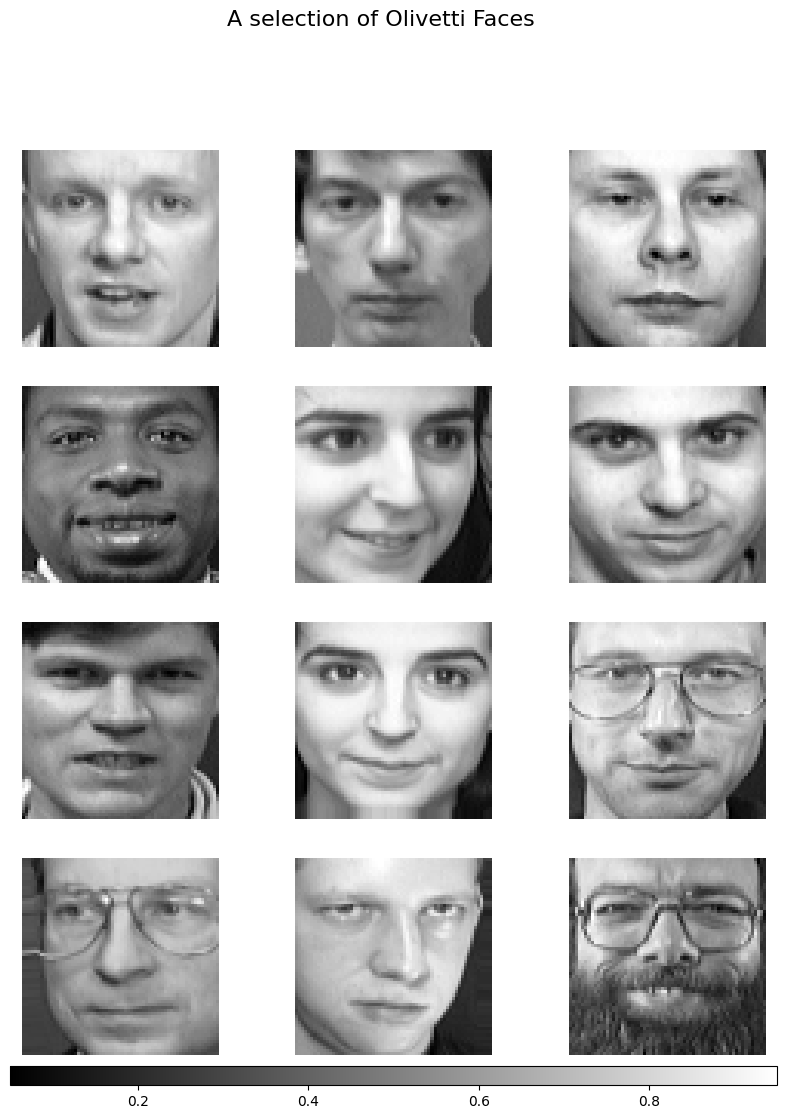

In [ ]:
fig, axes = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(10, 14))

for ax, img in zip(axes.flat, olivetti_images):
    image = ax.imshow(img, cmap="gray")
    fig.suptitle("A selection of Olivetti Faces", size=16)
    ax.axis("off")

if image is not None:
    fig.colorbar(image, ax=axes, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)

plt.show()

#### Add noise by sampling a Gaussian distribution

We visualise the effect of Gaussian noise by adding it to the original images and visualising them.

How much noise can we add before the images become unrecognisable?

Try changing ``STD`` (the $\sigma$ of the distribution) and rerun to see how the images change.

In [ ]:
MEAN = 20

STD = 0.2

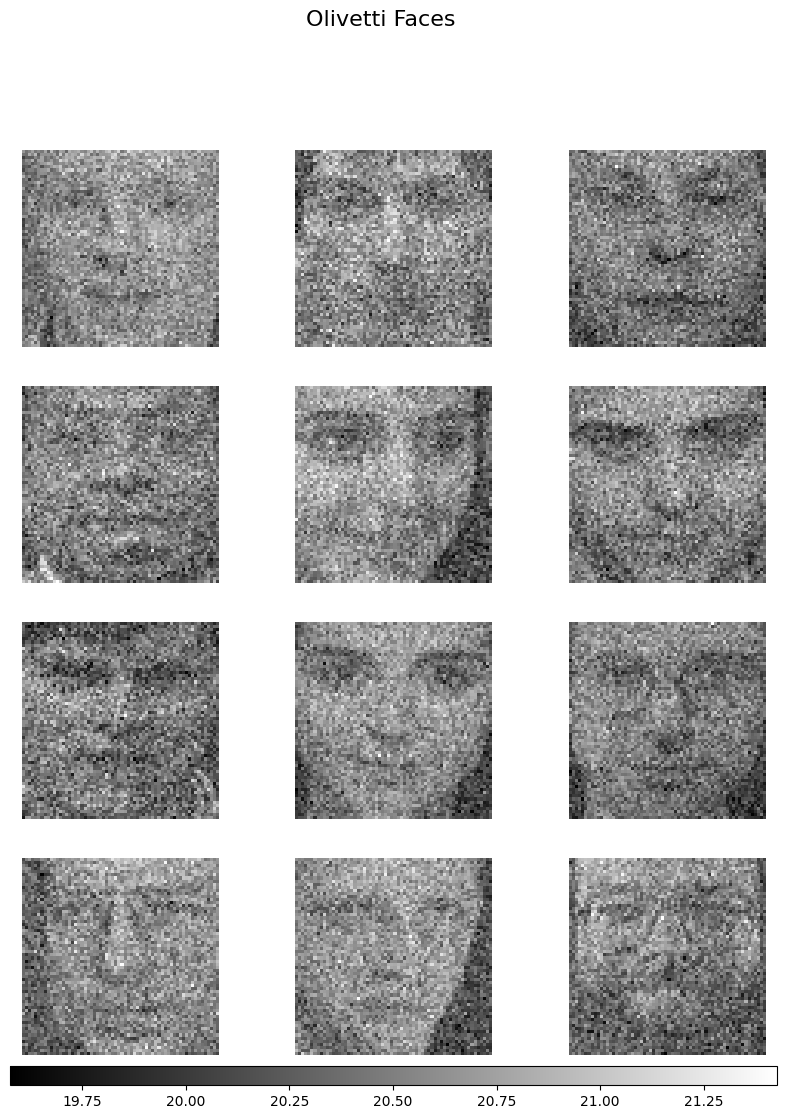

In [ ]:
fig, axes = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(10, 14))

for ax, img in zip(axes.flat, olivetti_images):
    image = img + np.random.normal(loc=MEAN, scale=STD, size=(64, 64))
    image = ax.imshow(image, cmap="gray")
    fig.suptitle("Olivetti Faces", size=16)
    ax.axis("off")

if image is not None:
    fig.colorbar(image, ax=axes, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)

plt.show()